# Import Necessary Libraries

In [1]:
import pandas as pd
import os

## Merging the 12 months data

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


### Updated DataFrame with all months included in one csv file

In [4]:
all_data = pd.read_csv('all_data.csv', index_col=0)
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


# Cleaning the data

In [5]:
# Checking for Nan in dataset
nan_df = all_data[all_data.isna()]
nan_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,NaN,NaN,NaN,NaN,NaN
222911,NaN,NaN,NaN,NaN,NaN
222912,NaN,NaN,NaN,NaN,NaN
222913,NaN,NaN,NaN,NaN,NaN
222914,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
259353,NaN,NaN,NaN,NaN,NaN
259354,NaN,NaN,NaN,NaN,NaN
259355,NaN,NaN,NaN,NaN,NaN


In [6]:
# Removing the Nan values in all elements
all_data = all_data.dropna(how='all')
all_data.isna()      # confirm all Nan's are removed

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,False,False,False,False,False
222911,False,False,False,False,False
222912,False,False,False,False,False
222913,False,False,False,False,False
222914,False,False,False,False,False
...,...,...,...,...,...
259353,False,False,False,False,False
259354,False,False,False,False,False
259355,False,False,False,False,False


In [9]:
# Find and delete "Or"
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [10]:
print(all_data['Month'].unique())

['07' '08' '04' '05' '10' '11' '06' '01' '02' '03' '12' '09']


### Converting columns to correct type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# 1. CHECKING THE BEST MONTH FOR SALES AND HOW MUCH WAS EARNED

 ### 1. Creating months columns

In [12]:
# Extracting the month
all_data.loc[:, 'Month'] = all_data['Order Date'].str[0:2]

# Converting the Month column to int32
all_data.loc[:, 'Month'] = all_data['Month'].astype('int32')

# Display the first few rows
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


### 2. Creating sales column

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


### 3. Checking the best month for sales

In [14]:
results = all_data.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### 4. Visualize the monthly sales

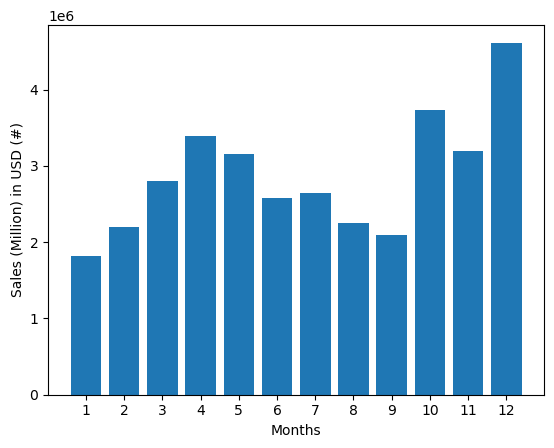

In [15]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales (Million) in USD (#)')
plt.show()


# Results 
## Insights from the data

### This shows that Decemeber is the best month in terms of sales with the highest sales of USD 4613443.34


# 2. CHECKING THE CITY WITH THE HIGHEST NUMBER OF SALES

### 1. Creating City Column

In [16]:
# Used lambda function to extract both city and state from 'Purchase Address'
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].strip().split(' ')[0]})")
all_data.head() # check column created

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA)
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA)
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA)


### 2. Group by City and sum by sales

In [17]:
# Group by City and sum of the Sales
city_sales = all_data.groupby('City')['Sales'].sum()
city_sales

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

### 3. Visualization of the City sales

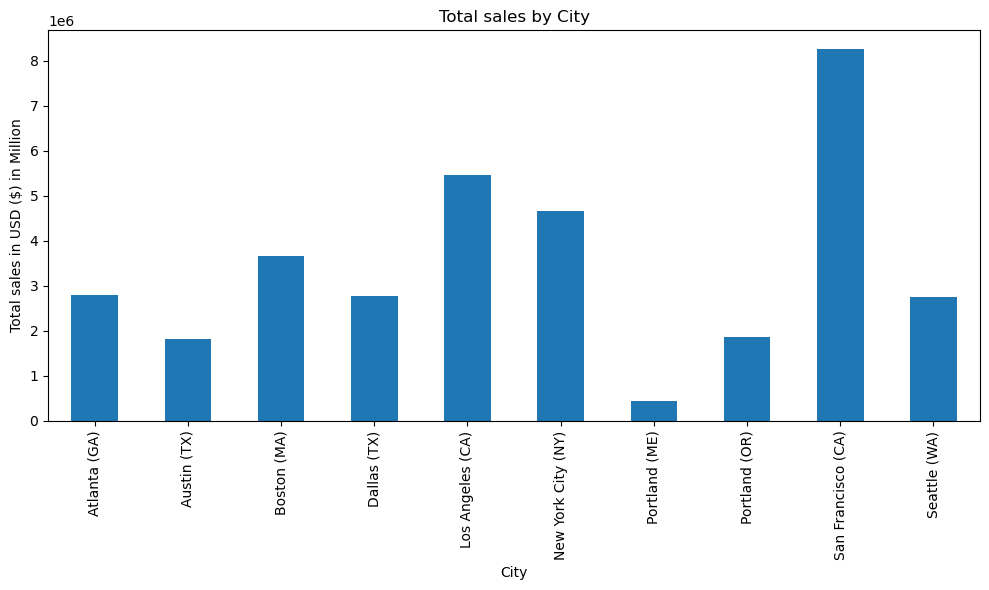

In [18]:
plt.figure(figsize=(10, 6)) # size of the graph
city_sales.plot(kind='bar')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Total sales in USD ($) in Million')
plt.title('Total sales by City')
plt.tight_layout() # Adjust layout to prevent label clipping
plt.show()

# Results 
## Insights from the data

### We can conclude that San Francisco is the city with the highest number of sales

# 3. CHECKING THE BEST TIME TO DISPLAY ADVERTS TO MAXIMISE THE LIKELIHOOD OF PURCHASE

### 1. Convert 'Order Date' using Datetime function

In [19]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA)
222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA)
222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA)


### 2. Create Hour and Minute columns

In [20]:
all_data['Hour'] = all_data['Order Date'].dt.hour # create Hour column - extract hour using dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute # create Minute column
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Order ID,,,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13


In [21]:
time_sales = all_data.groupby('Hour')['Sales'].count()
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Order ID,,,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13


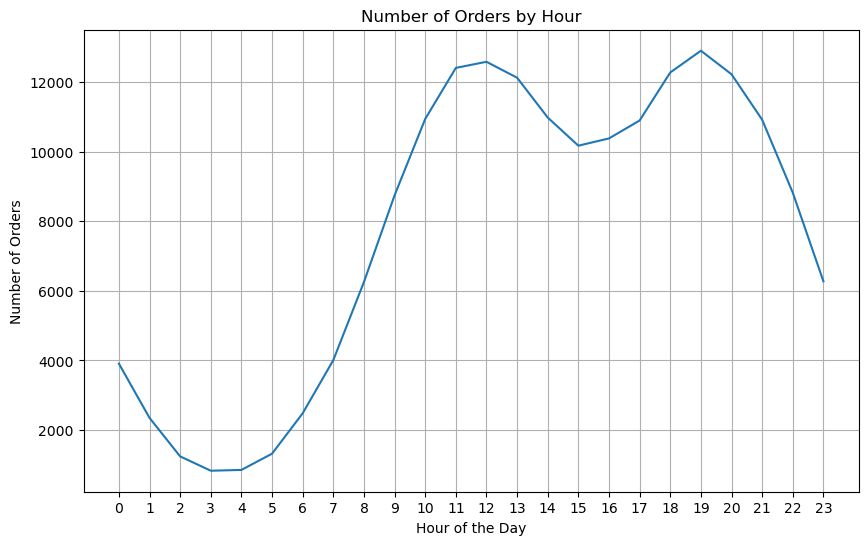

In [22]:
plt.figure(figsize=(10, 6))  # Set the size of the graph
time_sales.plot(kind='line')  # Plot the line graph
plt.xlabel('Hour of the Day')
plt.xticks(time_sales.index)
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.grid(True)  # Grid lines for better readability
plt.show()

# Results 
## Insights from the data

### The best hours for advertising products is between 10 AM - 12 PM and 5 PM - 7PM 

# 4. PRODUCTS THAT ARE OFTEN SOLD TOGETHER

In [23]:
# Reload the CSV file
all_data = pd.read_csv('all_data.csv')

# Check the first few rows
print(all_data.head())

  Order ID                   Product Quantity Ordered Price Each  \
0   222910  Apple Airpods Headphones                1        150   
1   222911             Flatscreen TV                1        300   
2   222912     AA Batteries (4-pack)                1       3.84   
3   222913     AA Batteries (4-pack)                1       3.84   
4   222914    AAA Batteries (4-pack)                5       2.99   

       Order Date                  Purchase Address  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101  


### 1. Check for duplicate values in the 'Order ID' column

In [24]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
118,223028,Vareebadd Phone,1,400,07/07/19 10:21,"969 10th St, San Francisco, CA 94016"
119,223028,USB-C Charging Cable,2,11.95,07/07/19 10:21,"969 10th St, San Francisco, CA 94016"
120,223028,Wired Headphones,1,11.99,07/07/19 10:21,"969 10th St, San Francisco, CA 94016"
140,223048,Vareebadd Phone,1,400,07/21/19 17:19,"168 8th St, Portland, OR 97035"
141,223048,USB-C Charging Cable,2,11.95,07/21/19 17:19,"168 8th St, Portland, OR 97035"
188,223095,Apple Airpods Headphones,1,150,07/03/19 13:42,"876 Cedar St, Los Angeles, CA 90001"
189,223095,AA Batteries (4-pack),1,3.84,07/03/19 13:42,"876 Cedar St, Los Angeles, CA 90001"
199,NaN,NaN,NaN,NaN,NaN,NaN
201,223106,Wired Headphones,1,11.99,07/14/19 14:30,"630 2nd St, San Francisco, CA 94016"
202,223106,Vareebadd Phone,1,400,07/14/19 14:30,"630 2nd St, San Francisco, CA 94016"


### 2. Group duplicates

In [25]:
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates() # Drop grouped duplicates
df.head()

,Order ID,Grouped
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
199,NaN,NaN
201,223106,"Wired Headphones,Vareebadd Phone"


In [28]:
df = df.dropna(subset=['Grouped']) # Drop NaN values

### 3. Find and out the most common pairs of products that are purchased together.

In [47]:
from itertools import combinations # Generate all possible combinations
from collections import Counter # Count hashable objects. Counts how often each product pair appears together

count = Counter() # create empty counter  to store and update each pair count

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print("These are the products pairs that are often sold together:\n")

# Check 10 most common product pairs
for key, value in count.most_common(10):
    print(key, value)

These are the products pairs that are often sold together:

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


# 5. PRODUCT WITH THE HIGHEST SALES AND JUSTIFICATION OF THE SALES

### 1. Check the number of products sold

In [94]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.count()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64

### 2. Check product prices

In [96]:
# Convert 'Price Each' to numeric, coerce errors will turn invalid parsing into NaN
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Drop rows where 'Price Each' is NaN
all_data = all_data.dropna(subset=['Price Each'])

# Group by 'Product' and calculate the mean of 'Price Each'
prices = all_data.groupby('Product')['Price Each'].mean()
print(prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


### 3. Visualize product sales

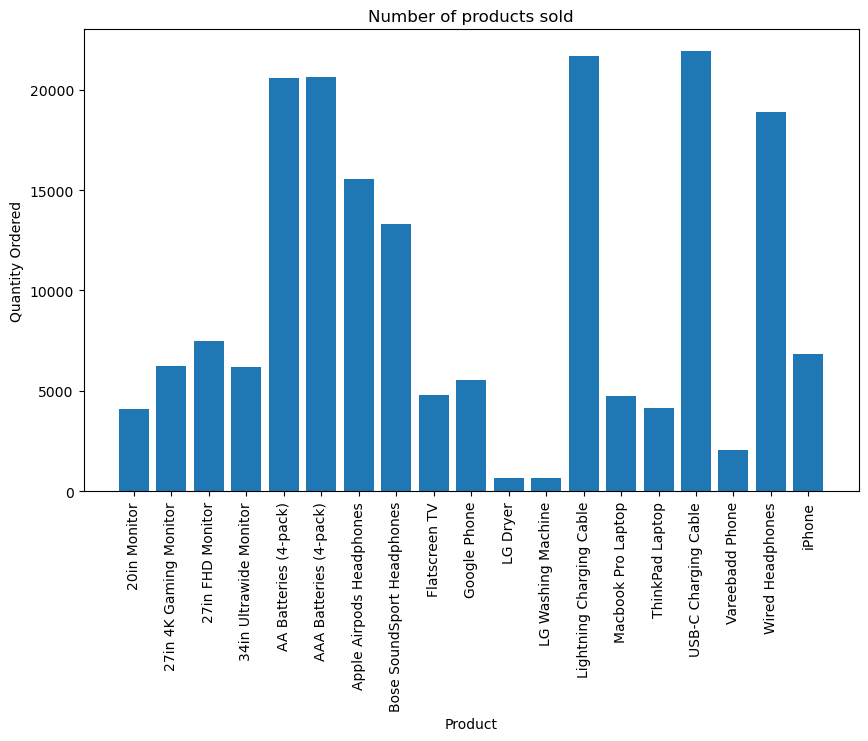

In [97]:
products = [product for product, df in product_group]

plt.figure(figsize=(10,6))
plt.bar(products,quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Number of products sold')
plt.xticks(products, rotation=90)
plt.show()

# Results 
## Insights from the data

From the data and the graph we can conclude that AA Batteries, Lightning Charging Cables and USB-C Charging Cables are the products with the most sales probably due to their relatively low price.